In [50]:
import pandas as pd
votes = pd.read_csv("114_congress.csv")
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [51]:
votes.groupby('party').sum()

,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
party,,,,,,,,,,,,,,,
D,31.0,3.5,0.5,43.5,0.5,38.5,3.5,43.5,1.5,1.5,37.5,43.5,1.5,39.5,34.5
I,1.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0
R,0.5,54.0,53.0,49.0,54.0,1.0,51.0,53.0,51.0,53.0,1.5,2.5,49.5,4.5,0.5


In [52]:
votes['party'].value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

In [53]:
votes.mean()

00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64

I will use Kmeans clustering with k=2 becuase I think senators' clusters will be align party lines.

In [54]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances=kmeans_model.fit_transform(votes.iloc[:,3:])
#labeling each senator based on the kmeans algorithm.
labels=kmeans_model.labels_

pd.crosstab(votes['party'],labels)

col_0,0,1
party,,
D,41,3
I,2,0
R,0,54


First cluster has 41 democrats and both independents. The second cluster has 54 republicans and 3 democrats!! Let's look into these 3:

In [55]:
democratic_outliers=votes[(labels==1)&(votes['party']=='D')]
democratic_outliers

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


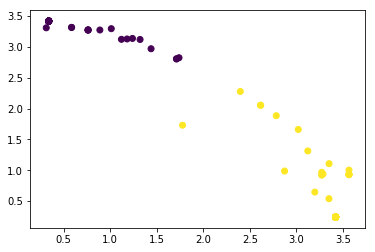

In [56]:
import matplotlib.pyplot as plt
plt.scatter(x=senator_distances[:,0],y=senator_distances[:,1],c=labels)
plt.show()

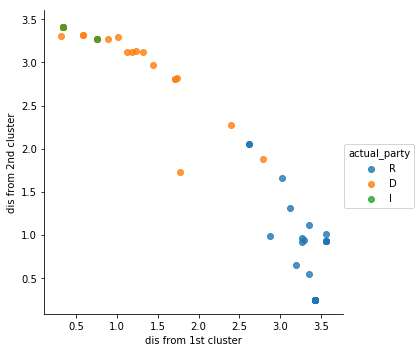

In [57]:
dis=pd.DataFrame(senator_distances)
dis.columns=['dis from 1st cluster','dis from 2nd cluster']
dis['actual_party']=votes['party']

import seaborn as sns
sns.lmplot(x='dis from 1st cluster',y='dis from 2nd cluster',data=dis,hue='actual_party',scatter=True,fit_reg=False)
plt.show()

Let's see who are the extremists. I will do that by creating a rating system :
* extremism rating=(distance from 1st cluster)^3 + (distance from 2nd cluster)^3 

In [58]:
extremism=((senator_distances)**3).sum(axis=1)
votes['extremism']=extremism
votes.sort_values('extremism',inplace=True,ascending=False)
votes.head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.250476
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
48,Johnson,R,WI,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
47,Isakson,R,GA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
65,Murkowski,R,AK,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
64,Moran,R,KS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
30,Enzi,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
